In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, auc, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
churn_data  =pd.read_csv("EDA_final.csv")
churn_data.drop(["Unnamed: 0"],axis=1,inplace=True)
churn_data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,Churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4965,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4966,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4967,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [3]:
churn_data.drop(["state","area.code"],axis=1,inplace=True)

In [5]:
X = churn_data.drop("Churn",axis=1)
y = churn_data[["Churn"]]

### Balancing the Dataset

In [6]:
y.value_counts()

Churn
0        4264
1         705
dtype: int64

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
smote_X,smote_y = smote.fit_resample(X,y)
smote_y.value_counts()

Churn
0        4264
1        4264
dtype: int64

In [8]:
X_train,X_test,y_train,y_test=train_test_split(smote_X,smote_y,test_size=0.20,random_state=123)

### Scaling Down the Data

In [15]:
scaler = MinMaxScaler()
scaled_churn_data = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_churn_data,columns=X_test.columns)

In [16]:
scaled_X_train

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,0.534483,0.0,0.0,0.0,0.553781,0.05,0.553966,0.305199,0.612121,0.305221,0.469335,0.562130,0.469417,0.652955,0.554286,0.653099,0.500
1,0.504310,0.0,0.0,0.0,0.477016,0.10,0.476895,0.414371,0.496970,0.414348,0.539022,0.597633,0.539173,0.411627,0.440000,0.411836,0.625
2,0.525862,0.0,0.0,0.0,0.358257,0.25,0.358100,0.360366,0.618182,0.360397,0.360798,0.568047,0.360961,0.663735,0.708571,0.664079,0.375
3,0.168103,0.0,0.0,0.0,0.525000,0.15,0.525926,0.482788,0.696970,0.482764,0.388782,0.727811,0.388871,0.662998,0.657143,0.663366,0.500
4,0.620690,0.0,0.0,0.0,0.985000,0.20,0.985185,0.384068,0.739394,0.384036,0.567226,0.520710,0.567454,0.551363,0.514286,0.551543,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,0.474138,0.0,0.0,0.0,0.399964,0.10,0.399449,0.489505,0.357576,0.489529,0.502891,0.627219,0.502862,0.417443,0.582857,0.417709,0.500
6818,0.375000,0.0,0.0,0.0,0.720811,0.10,0.721477,0.758974,0.751515,0.758975,0.677328,0.662722,0.677460,0.417633,0.651429,0.417530,0.000
6819,0.418103,0.0,0.0,0.0,0.529679,0.30,0.530411,0.335088,0.490909,0.335123,0.598759,0.627219,0.598904,0.668160,0.554286,0.668229,0.750
6820,0.551724,0.0,0.0,0.0,0.575000,0.30,0.575926,0.529161,0.769697,0.529116,0.721199,0.568047,0.721449,0.259172,0.360000,0.259173,0.500


In [13]:
scaled_churn_test= scaler.transform(X_test)
scaled_X_test = pd.DataFrame(scaled_churn_test,columns=X_test.columns)

In [11]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(sampling_strategy="minority")
#X_sm,y_sm = smote.fit_resample(X,y)
#y_sm.value_counts()

### Modeling

In [17]:
model_logistic = LogisticRegression()
model_logistic.fit(scaled_X_train,y_train)

LogisticRegression()

In [18]:
y_pred = model_logistic.predict(scaled_X_test)

In [19]:
acc1 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc1)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       823
           1       0.78      0.66      0.72       883

    accuracy                           0.73      1706
   macro avg       0.74      0.73      0.73      1706
weighted avg       0.74      0.73      0.73      1706

Accuracy = 0.7297772567409144


<h2><center> 2.SUPPORT VECTOR CLASSIFIER</center></h2>

In [20]:
clf = SVC()

kernel: 'poly'
parameters ={'kernel':['rbf'],
              'gamma':[100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
               'C':[50, 15, 10, 6, 5, 0.1, 0.001, 0.0001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv=10)

gsv.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 15, 10, 6, 5, 0.1, 0.001, 0.0001],
                         'gamma': [100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
                         'kernel': ['rbf']})

In [20]:
gsv.best_params_

{'C': 50, 'gamma': 50, 'kernel': 'rbf'}

In [31]:
gsv.best_score_

0.9678988677689855

In [21]:
svc_model = SVC(C = 50, gamma =50, kernel='rbf')
svc_model.fit(X_train , y_train)

SVC(C=50, gamma=50)

In [22]:
y_pred_svc = svc_model.predict(X_test)

In [23]:
acc2 = accuracy_score(y_test,y_pred_svc)
print('Classification Report : \n',classification_report(y_test,y_pred_svc))
print('='*50)
print('Accuracy =',acc2)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       861
         1.0       0.99      0.91      0.95       845

    accuracy                           0.95      1706
   macro avg       0.96      0.95      0.95      1706
weighted avg       0.96      0.95      0.95      1706

Accuracy = 0.9548651817116061


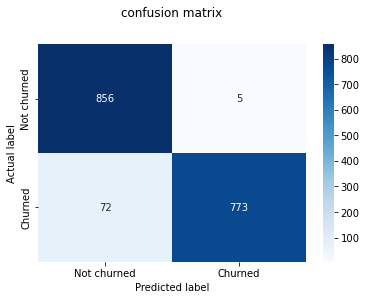

In [24]:
cm = confusion_matrix(y_test,y_pred_svc)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [25]:
svc_model.score(X_train,y_train)

1.0

In [26]:
svc_model.score(X_test,y_test)

0.9548651817116061

<h2><center>3. Decision Tree</center></h2>

In [27]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=124)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=124),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [28]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=124)

In [29]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9, max_features='auto', random_state=124)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=124)

In [30]:
#Predicting on test data
y_pred_dt = dt_model.predict(X_test) # predicting on test data set 

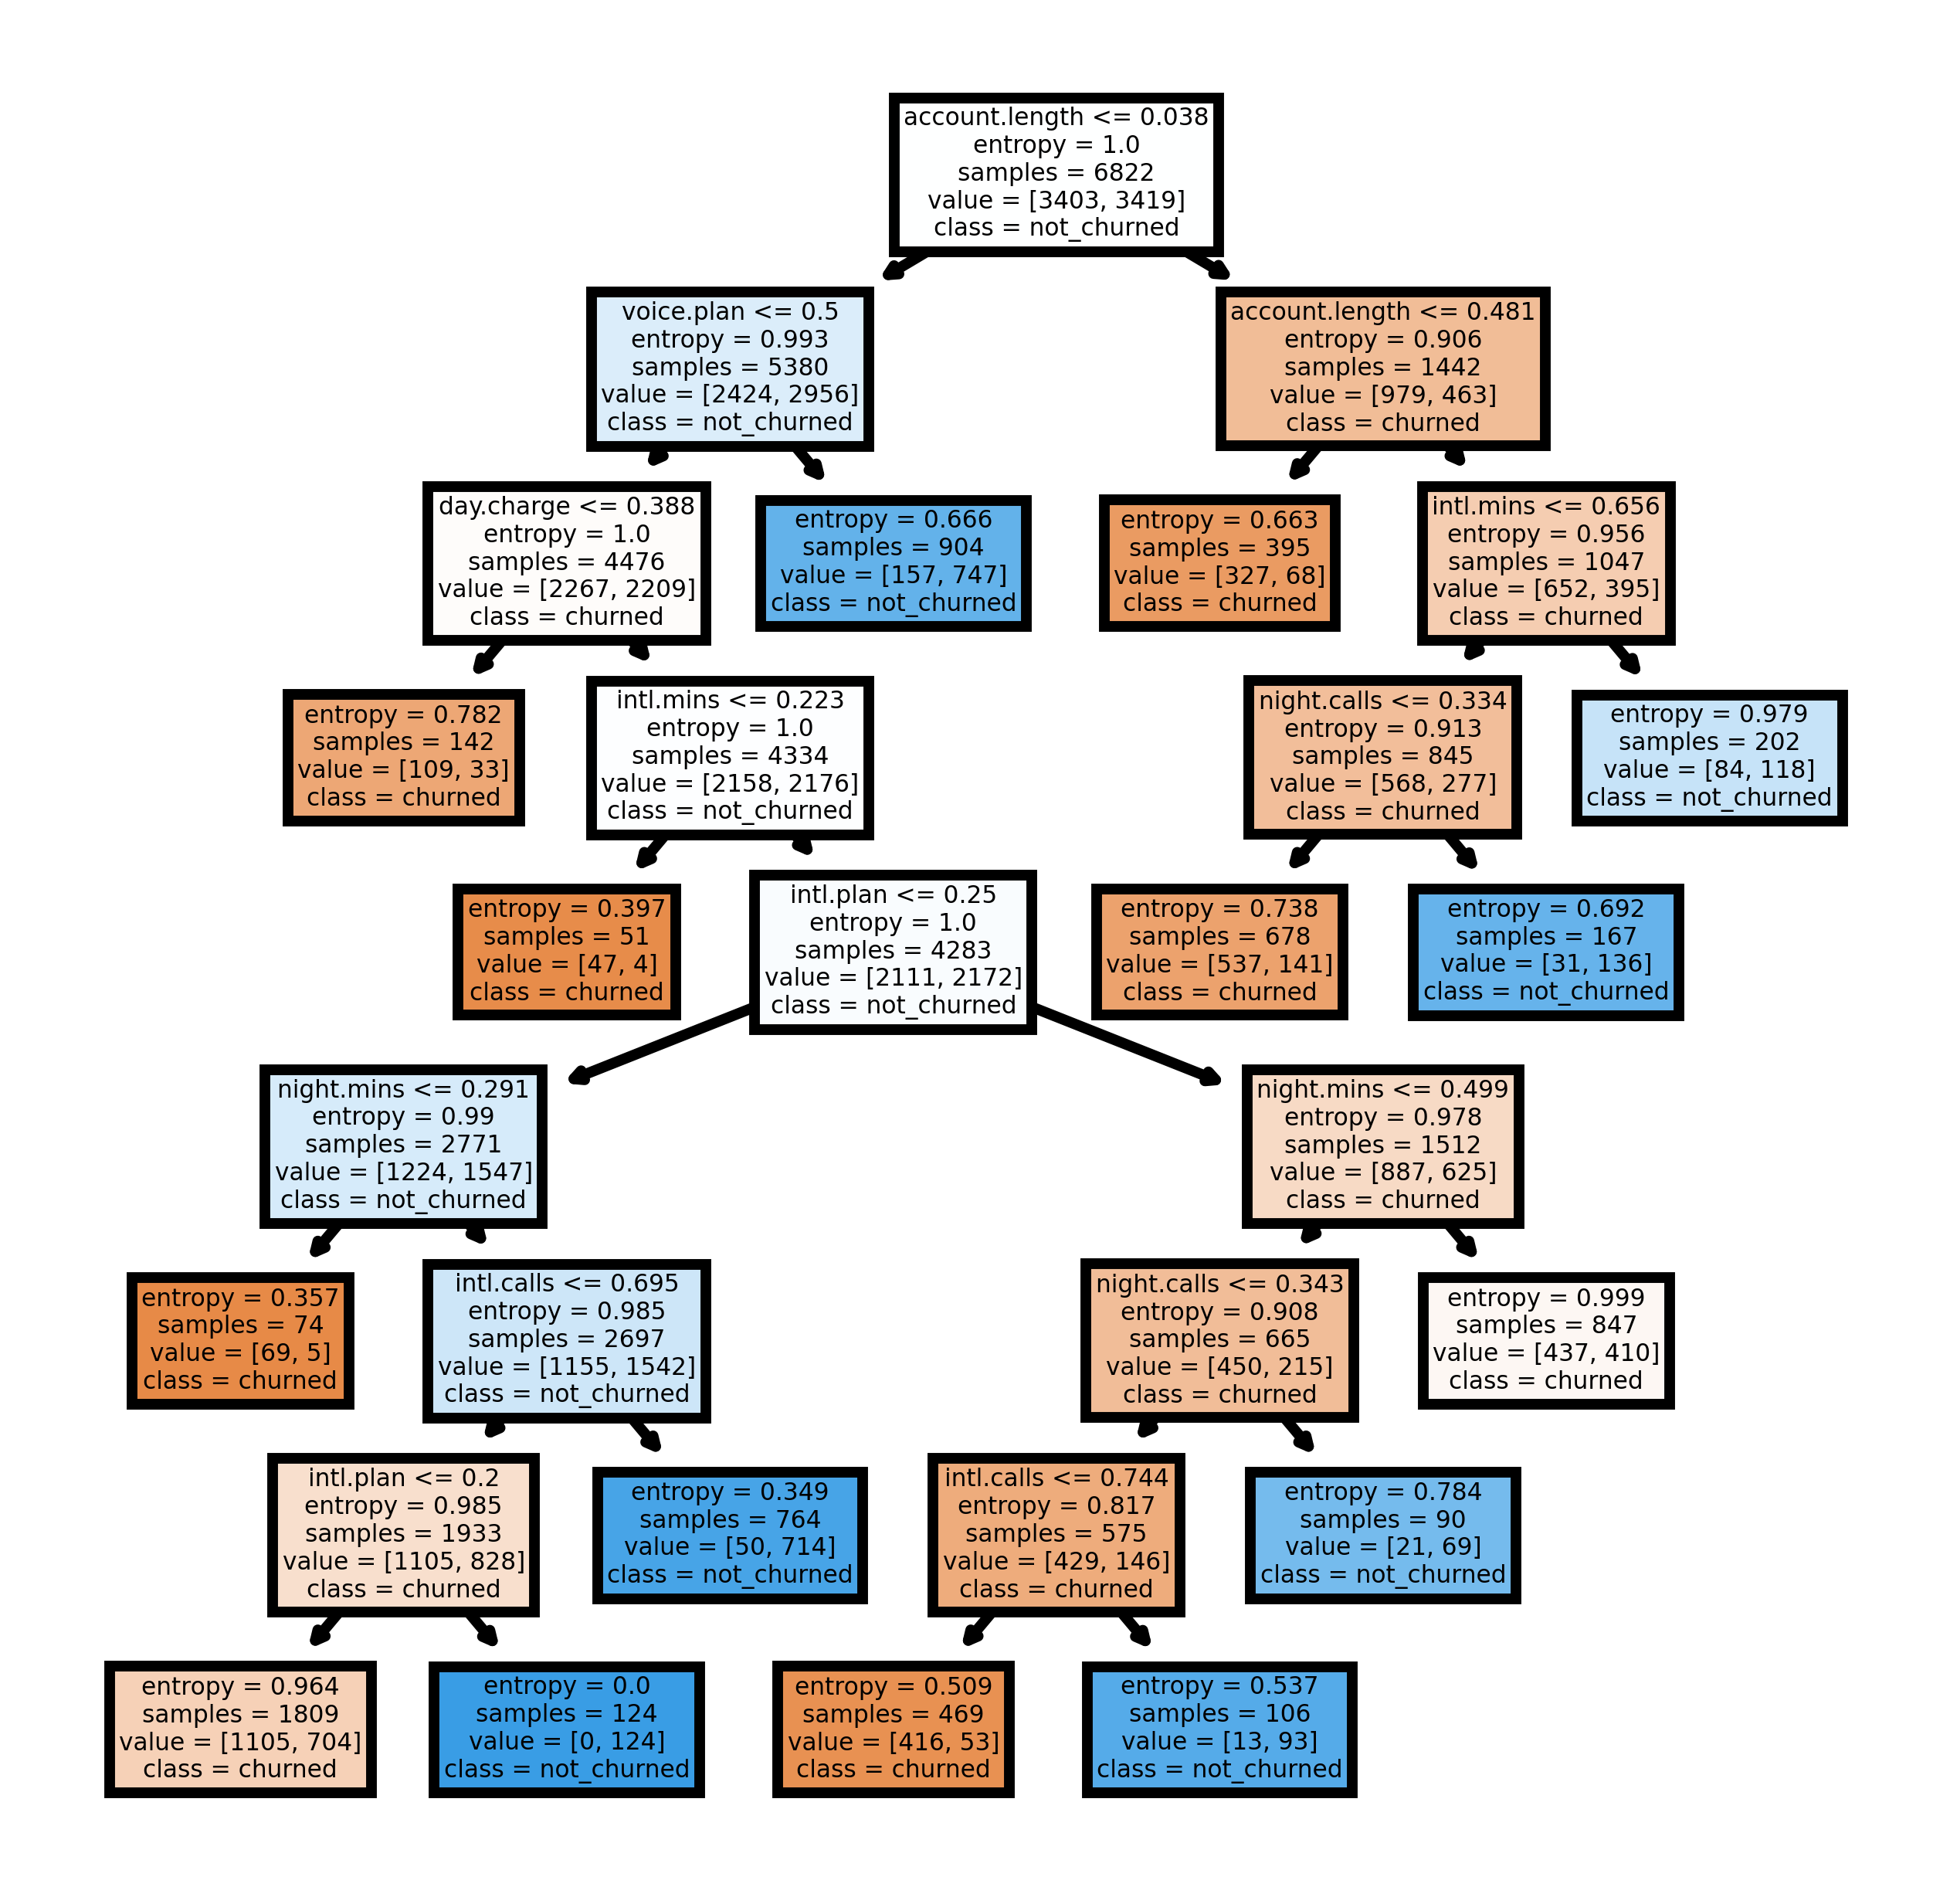

In [31]:
fn=['state','area.code','account.length','voice.plan','voice.messages','intl.plan','intl.mins','intl.calls','intl.charge','day.mins','day.calls','day.charge','eve.mins','eve.calls','eve.charge','night.mins','night.calls','night.charge','customer.calls']
cn=['churned','not_churned']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)
plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [32]:
acc3 = accuracy_score(y_test,y_pred_dt)
print('Classification Report : \n',classification_report(y_test,y_pred_dt))
print('='*50)
print('Accuracy =',acc3)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.69      0.90      0.78       861
         1.0       0.85      0.58      0.69       845

    accuracy                           0.74      1706
   macro avg       0.77      0.74      0.74      1706
weighted avg       0.77      0.74      0.74      1706

Accuracy = 0.7438452520515827


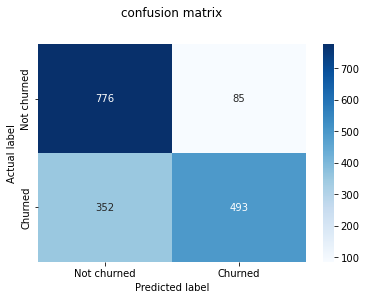

In [33]:
cm = confusion_matrix(y_test,y_pred_dt)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [34]:
dt_model.score(X_train,y_train)

0.7399589563177954

In [35]:
dt_model.score(X_test,y_test)

0.7438452520515827

<h2><center> 4.RANDOM FOREST </center></h2>

In [36]:
rfc=RandomForestClassifier(random_state=42)

In [37]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [38]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [39]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [40]:
rfc_model = RandomForestClassifier(n_estimators = 200,max_features="auto" ,max_depth=8 ,criterion = "gini")
rfc_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200)

In [41]:
y_pred_rfc = rfc_model.predict(X_test)

In [42]:
acc4 = accuracy_score(y_test,y_pred_rfc)
print("Classification report : \n",classification_report(y_test,y_pred_rfc))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.92       861
         1.0       0.96      0.87      0.92       845

    accuracy                           0.92      1706
   macro avg       0.92      0.92      0.92      1706
weighted avg       0.92      0.92      0.92      1706

Accuracy Score 0.9202813599062134


Text(0.5, 14.09375, 'Predicted label')

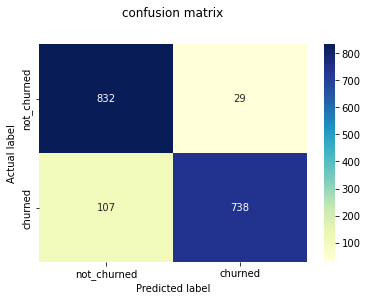

In [43]:
cm = confusion_matrix(y_test,y_pred_rfc)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [44]:
rfc_model.score(X_train,y_train)

0.9378481383758429

In [45]:
rfc_model.score(X_test,y_test)

0.9202813599062134

<h2><center> 5.K-NEAREST NEIGHBOUR </center></h2>

In [57]:
KNN=KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [58]:
# defining parameter range
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [59]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [60]:
grid_search.best_params_

{'n_neighbors': 2}

In [61]:
KNN_model = KNeighborsClassifier(n_neighbors=2)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [62]:
y_pred_knn = KNN_model.predict(X_test)

In [63]:
acc5 = accuracy_score(y_test,y_pred_knn)
print("Classification report : \n",classification_report(y_test,y_pred_knn))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

         0.0       0.99      0.89      0.94       861
         1.0       0.90      0.99      0.94       845

    accuracy                           0.94      1706
   macro avg       0.94      0.94      0.94      1706
weighted avg       0.94      0.94      0.94      1706

Accuracy Score 0.9167643610785463


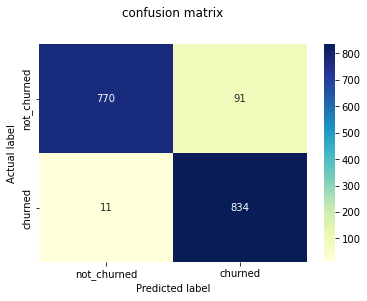

In [64]:
cm = confusion_matrix(y_test,y_pred_knn)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [65]:
KNN_model.score(X_train,y_train)

0.9983875696276752

In [66]:
KNN_model.score(X_test,y_test)

0.94021101992966

<h2><center> 6.ANN MODEL </center></h2>

In [67]:
# Define the model architecture
ANN_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ANN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



# Evaluate the model on the test set
loss, acc6 = ANN_model.evaluate(X_test, y_test)

Epoch 1/100
214/214 [==============================] - 2s 4ms/step - loss: 0.6273 - accuracy: 0.6577 - val_loss: 0.5686 - val_accuracy: 0.7515
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 0.5490 - accuracy: 0.7599 - val_loss: 0.5210 - val_accuracy: 0.7655
Epoch 3/100
214/214 [==============================] - 1s 3ms/step - loss: 0.5160 - accuracy: 0.7763 - val_loss: 0.4982 - val_accuracy: 0.7778
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 0.4926 - accuracy: 0.7886 - val_loss: 0.4862 - val_accuracy: 0.7884
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 0.4745 - accuracy: 0.8014 - val_loss: 0.4684 - val_accuracy: 0.7984
Epoch 6/100
214/214 [==============================] - 1s 3ms/step - loss: 0.4546 - accuracy: 0.8116 - val_loss: 0.4449 - val_accuracy: 0.8177
Epoch 7/100
214/214 [==============================] - 1s 3ms/step - loss: 0.4332 - accuracy: 0.8264 - val_loss: 0.4262 - val_accuracy: 0.8265

Epoch 58/100
214/214 [==============================] - 1s 2ms/step - loss: 0.2653 - accuracy: 0.8952 - val_loss: 0.2927 - val_accuracy: 0.8851
Epoch 59/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.8977 - val_loss: 0.3209 - val_accuracy: 0.8763
Epoch 60/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2605 - accuracy: 0.8977 - val_loss: 0.2994 - val_accuracy: 0.8792
Epoch 61/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2590 - accuracy: 0.8977 - val_loss: 0.2959 - val_accuracy: 0.8828
Epoch 62/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.8981 - val_loss: 0.2908 - val_accuracy: 0.8822
Epoch 63/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2575 - accuracy: 0.8980 - val_loss: 0.3187 - val_accuracy: 0.8775
Epoch 64/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.9006 - val_loss: 0.2920 - val_accuracy:

In [68]:
print("Test Accuracy",acc6)

Test Accuracy 0.8915591835975647


## ENSEMBLE TECHNIQUE

In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_model = LogisticRegression(random_state=42)
rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [70]:
from sklearn.metrics import f1_score
rf_pred = rf_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)
print("Logistic Regression Accuracy:", logreg_acc)
print("Logistic Regression F1 Score:", logreg_f1)

Random Forest Accuracy: 0.9560375146541618
Random Forest F1 Score: 0.954954954954955
Logistic Regression Accuracy: 0.7942555685814772
Logistic Regression F1 Score: 0.7958115183246074


In [71]:
ensemble_pred = np.round((rf_pred + logreg_pred)/2)
ensemble_acc = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)

print("Ensemble Accuracy:", ensemble_acc)
print("Ensemble F1 Score:", ensemble_f1)

Ensemble Accuracy: 0.8862837045720985
Ensemble F1 Score: 0.874025974025974


<h2><center> 1. ADA BOOST </center></h2>

In [72]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [73]:
seed = 10
num_trees = 30

In [85]:
kfold = KFold(n_splits=5)
ada_model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(ada_model,smote_X,smote_y,cv=kfold)
print(results.mean())

0.8346576684669941


<h2><center> 2. XG BOOST </center></h2>

In [86]:
from sklearn import svm
from xgboost import XGBClassifier

In [87]:
clf = XGBClassifier()

In [88]:
kfold = KFold(n_splits=5)
xg_model = XGBClassifier(n_estimators = num_trees)
results = cross_val_score(xg_model,smote_X,smote_y,cv=kfold)
print(results.mean())

0.9568493466220653


<h2><center> 3. Stacking </center></h2>

In [89]:
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [90]:
clf1=KNeighborsClassifier(n_neighbors=1)
clf2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()
lr=LogisticRegression()
sclf=StackingClassifier(classifiers=[clf1,clf2,clf3],use_probas=True,meta_classifier=lr)

In [91]:
print('3-fold cross validation:\n')

for clf,label in zip([clf1,clf2,clf3,sclf],['KNN','Random_forest','Naive_bayes','StackingClassifier']):
    scores=cross_val_score(clf,smote_X,smote_y,cv=3,scoring='f1_macro')
    print("f1 Scores:",(scores.mean(),label))

3-fold cross validation:

f1 Scores: (0.9244422689590394, 'KNN')
f1 Scores: (0.9539031586652129, 'Random_forest')
f1 Scores: (0.8033062446139887, 'Naive_bayes')
f1 Scores: (0.9244422689590394, 'StackingClassifier')


In [92]:
print('3-fold cross validation:\n')

for clf,label in zip([clf1,clf2,clf3,sclf],['KNN','Random_forest','Naive_bayes','StackingClassifier']):
    scores=cross_val_score(clf,smote_X,smote_y,cv=3,scoring='f1_macro')
    print("f1 Scores:%0.2f (+/- %0.2f)[%s]"%(scores.mean(),scores.std(),label))

3-fold cross validation:

f1 Scores:0.92 (+/- 0.00)[KNN]
f1 Scores:0.95 (+/- 0.01)[Random_forest]
f1 Scores:0.80 (+/- 0.01)[Naive_bayes]
f1 Scores:0.92 (+/- 0.00)[StackingClassifier]


<h2><center> 4. BAGGING </center></h2>

In [93]:
from sklearn.ensemble import BaggingClassifier

In [94]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,max_features=5,random_state=42)

In [95]:
bagging_clf.fit(X_train,y_train).score(X_test,y_test)

0.947831184056272

### Finding the best model

In [96]:
data = {"MODEL":pd.Series(["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","KNN","ANN","Ensemble"]),"Accuracy":pd.Series([acc1,acc2,acc3,acc4,acc5,acc6,ensemble_acc])}
Accuracy_table=pd.DataFrame(data)
Accuracy_table.sort_values(by='Accuracy')

,MODEL,Accuracy
0,Logistic Regression,0.794256
2,Decision Tree,0.822392
6,Ensemble,0.886284
5,ANN,0.891559
3,Random Forest,0.916764
4,KNN,0.940211
1,Support Vector Machine,0.966589


In [47]:
import pickle

In [48]:
file_name ="Svm_model_bs.pkl"
with open (file_name,"wb") as file:
    pickle.dump(svc_model,file)